<a href="https://colab.research.google.com/github/cheronoF/Crypto-Analysis-R-Week-12/blob/main/Wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Python program to generate WordCloud
 
# Importing all necessary modules

import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np


In [5]:
# Reads 'Youtube04-Eminem.csv' file

df = pd.read_csv("/content/USvideos.csv")


In [6]:
# First 5 rows 
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374.0,57527.0,2966.0,15954.0,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783.0,97185.0,6146.0,12703.0,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434.0,146033.0,5339.0,8181.0,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168.0,10172.0,666.0,2146.0,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731.0,132235.0,1989.0,17518.0,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [13]:
# Last 5 rows 
df.tail(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
14475,16a1LttU5qc,18.27.01,I carve a pencil from a pencil from a pencil ...,Bobby Duke Arts,26,2018-01-23T22:02:35.000Z,[none],1595800.0,69892.0,1616.0,5723.0,https://i.ytimg.com/vi/16a1LttU5qc/default.jpg,False,False,False,Has science gone too far? I think it may have....
14476,jyNFL5t2A-U,18.27.01,Watch Courtroom Erupt In Applause After Larry ...,MSNBC,25,2018-01-24T19:02:11.000Z,"U.S. news|""Sexual Misconduct""|""MSNBC""|""news ch...",239728.0,2381.0,273.0,1278.0,https://i.ytimg.com/vi/jyNFL5t2A-U/default.jpg,False,False,False,Warning: some testimony and statements may be ...
14477,4MYaA4WEo1Y,18.27.01,Undercover footage from inside secretive Presi...,Business Insider UK,25,2018-01-24T13:14:57.000Z,"Business|""Insider""|""BI""|""UK""|""Europe""|""News""|""...",93641.0,184.0,605.0,285.0,https://i.ytimg.com/vi/4MYaA4WEo1Y/default.jpg,False,False,False,Financial Times reporter Madison Marriage took...
14478,_fVUX6-7VKE,18.27.01,"7.9 earthquake hits near Kodiak, AK",Fox News,25,2018-01-23T11:41:16.000Z,"Disasters|""Earthquakes""|""On Air""|""Primary US""|...",1144929.0,6681.0,1180.0,3621.0,https://i.ytimg.com/vi/_fVUX6-7VKE/default.jpg,False,False,False,"Millions under tsunami warning, being sent to ..."
14479,kDiJh8loTOE,18.27.01,Falcon Heavy and 9 static fires - What you nee...,Everyday Astronaut,28,2018-01-24T21:07:11.000Z,"Falcon Heavy static fire|""Why does spacex stat...",170622.0,6147.0,88.0,590.0,https://i.ytimg.com/vi/kDiJh8loTOE/default.jpg,False,False,False,"It’s ALIVE!!!!! For the very first time, the F..."
14480,OGYASOBiU_E,18.27.01,Last Names,Domics,23,2018-01-24T02:16:15.000Z,"domics|""animation""|""Last Names""|""surname""|""chi...",2105929.0,163278.0,1220.0,44541.0,https://i.ytimg.com/vi/OGYASOBiU_E/default.jpg,False,False,False,Receive your own crate of awesome from Loot Cr...
14481,AKstzozuLKY,18.27.01,Christina Aguilera Watches Erika Jayne Crush “...,Lip Sync Battle,24,2018-01-24T15:00:21.000Z,"Singing|""Lip Sync Battle""|""Dancing""|""Lip Synci...",225028.0,1813.0,110.0,55.0,https://i.ytimg.com/vi/AKstzozuLKY/default.jpg,False,False,False,Singer and reality star Erika Jayne (“The Real...
14482,Z00-9MhEw5o,18.27.01,Vegan Mystery Meat Taste Test w/ Christine Syd...,MyHarto,23,2018-01-24T21:09:48.000Z,"hannah hart|""hannah""|""hart""|""hanna hart""|""hart...",140710.0,7948.0,83.0,309.0,https://i.ytimg.com/vi/Z00-9MhEw5o/default.jpg,False,False,False,Today I taste test mystery vegan meat with Chr...
14483,8gcUmiOlM1M,18.27.01,Seven Seconds | Official Trailer [HD] | Netflix,Netflix,24,2018-01-24T15:19:31.000Z,"Netflix|""Trailer""|""Netflix Original Series""|""N...",360896.0,4444.0,367.0,772.0,https://i.ytimg.com/vi/8gcUmiOlM1M/default.jpg,False,False,False,How long does it take to bury the truth? From ...
14484,cMtHByGJ8Ao,18.27.01,SCOTTY SIRE - MISTER GLASSMAN (Official Lyric ...,Scotty Sire,23,2018-01-24T01:27:57.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Size of the dataset 

df.shape

(14485, 16)

In [14]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [9]:
comment_words = ''
stopwords = set(STOPWORDS)

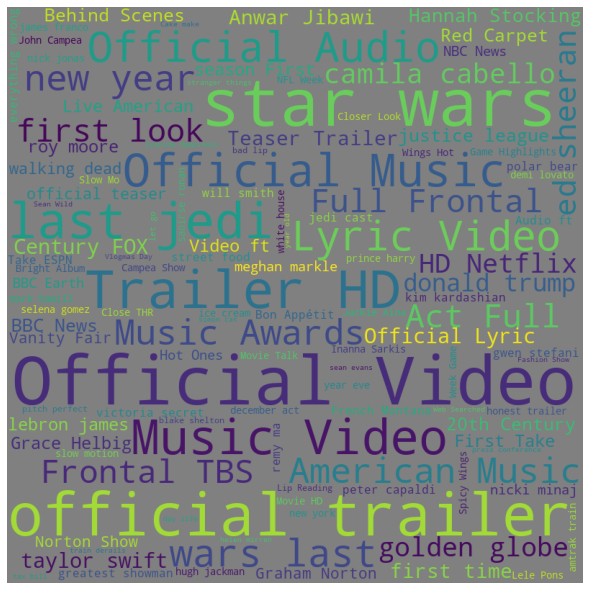

In [17]:
# Iterate through the csv file

for val in df.likes:
  # typecasting each val to string 
  val = str(val)

  #split the value
  tokens = val.split() 

  # Converts each token into lowercase 

  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
       
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='grey',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()